<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/MonteCarlo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 simulation

https://github.com/paulvangentcom/python_corona_simulation/

# $\pi$ calculation

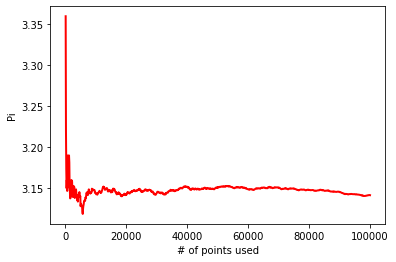

In [ ]:
import numpy as np
import matplotlib.pylab as plt

points_total, points_within_circle = 100000, 0

index_array = []
pi_array = []

for i in range(points_total+1):
    rnd1 = np.random.random()
    rnd2 = np.random.random()
    radius_sqr = rnd1*rnd1 + rnd2*rnd2
    if(radius_sqr < 1.):
        points_within_circle += 1
        
    if(i%100==0 and i>0):
        index_array.append(i)
        pi_array.append(4*points_within_circle/i)

plt.figure()
plt.plot(index_array, pi_array, 'r-', linewidth=2.0)
plt.xlabel('# of points used')
plt.ylabel('Pi')
plt.show()

# Buffon needles

Given a needle of length $\ell$ dropped on a plane ruled with parallel lines with a distance of $d$ apart, what is the probability that the needle will lie across a line upon landing? ($\ell \le d$)

The probability is $P = \frac{2\ell}{\pi d}$

# of needlles throwed:  5000  Pi= 3.190810465858328


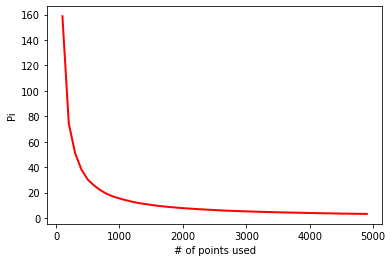

In [ ]:
import random as rndm
import numpy as np
import matplotlib.pylab as plt

# distance between two lines is d
# length of the needle is l
# l <= d
# the probability that the needle touches or intersets a line is 
# P = 2*l/(pi*d)

l, d = 1, 1
n, count = 5000, 0

index_array = []
pi_array = []

for i in range(n):
  a = rndm.uniform(0, d/2)  # uniformly distributed number between 0 and d/2
  phi = rndm.uniform(0, np.pi) # uniformly distributed number between 0 and pi
  b = (l/2)*np.sin(phi)
    
  if a <= b:
    count = count + 1

# calculate the probability
  P = count/n

  if(i%100==0 and i>0):
    index_array.append(i)
    pi_array.append((2*l)/(P*d))

P = count/n
print("# of needlles throwed: ", n, " Pi=", 2*l/(P*d))

plt.figure()
plt.plot(index_array, pi_array, 'r-', linewidth=2.0)
plt.xlabel('# of points used')
plt.ylabel('Pi')
plt.show()

# Random number (linear congruential)

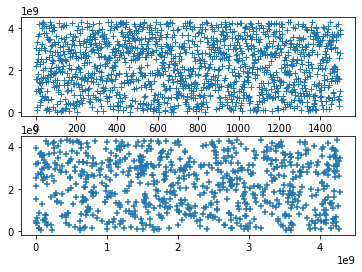

In [ ]:
import matplotlib.pyplot as plt

N = 1500
a = 1664525
c = 1013904223
m = 4294967296
x = 1

results = []
results_odd = []
results_even = []

for i in range(N):
    x = (a*x+c)%m
    results.append(x)

    if(i%2==0):
        results_even.append(x)
    else:
        results_odd.append(x)

plt.figure(1)
plt.subplot(211)
plt.plot(results, '+')
plt.subplot(212)
plt.scatter(results_even, results_odd, marker='+')
plt.show()

# Random number Mersenne Twister

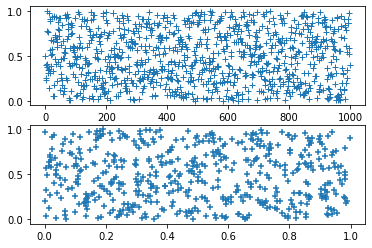

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rnd

N = 1000

rnd.seed(50)
results = []
results_odd = []
results_even = []

for i in range(N):
    x = rnd.random()
    results.append(x)
    if(i%2==0):
        results_even.append(x)
    else:
        results_odd.append(x)

plt.figure(1)
plt.subplot(211)
plt.plot(results, '+')
plt.subplot(212)
plt.scatter(results_even, results_odd, marker='+')
plt.show()

# Linear Feedback Shift Register (LFSR)

a 4-bit LFSR with feedback polynomial $1+x^3+x^4$

Used for hardware (like FPGA) to generate random number consequences

In [ ]:
seed = 0b_0001   # set to a different non-zero number will generate a new set of random numbers
num = seed

# define masks
# mask1 used to extract the value of the memory cell whose input is the output of the XOR gate (b0 = b0 XOR b1)
mask1 = 0b_0001
# mask2 used to extract the values of b1 and b2
mask2 = 0b_0110
# mask3 used to extract the value of b0
mask3 = 0b_0001

# counter
period = 0

while True:
    print(num)

    temp1 = ( (num>>1) ^ (num<<0)) & mask1
    temp2 = (num>>1) & mask2
    temp3 = (num & mask3)<<3
    num = temp1 | temp2 | temp3

    period += 1

    if num == seed:
        print("Period = ", period)
        break

1
9
13
15
14
7
10
5
11
12
6
3
8
4
2
Period =  15


0.5759766474297892
4


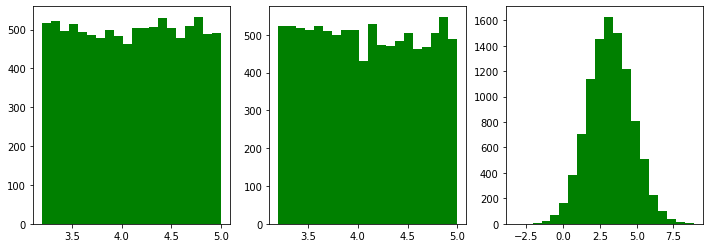

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rnd

N = 10000

#rnd.seed(1)
x = rnd.random()
print(x)

xs = []
for i in range(N):
  xs.append(rnd.uniform(3.2, 5.0))

xs_new = rnd.uniform(3.2, 5.0, N)

# the histogram of the data
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(xs, bins=20, color='g')

plt.subplot(132)
plt.hist(xs_new, bins=20, color='g')

plt.subplot(133)
xs_normal = rnd.normal(3.2, 1.5, N)
plt.hist(xs_normal, bins=20, color='g')

x = rnd.randint(3, 10)
print(x)

In [ ]:
import numpy.random as rnd

mylist = ["apple", "banana", "cherry", "plum", "peach"]
rnd.shuffle(mylist)

print(mylist)

['plum', 'apple', 'banana', 'cherry', 'peach']


# Investment game

Imagine that we are playing the following game:
I use a uniformly distributed random number generator to produce a number.
If the number I generate is greater than or equal to 40, you win (so you have 
a 60% chance of victory) and I pay you some money. If it is below 40, I win and you pay me the same amount.

Now I offer you the the following choices. We can either:

Game 1 — play 100 times, betting \$1 each time.

Game 2— play 10 times, betting \$10 each time.

Game 3— play one time, betting \$100.

Which would you pick? The expected value of each game is the same:

Expected Value Game 1 = (0.60*1 + 0.40*-1)*100 = 20

Expected Value Game 2= (0.60*10 + 0.40*-10)*10 = 20

Expected Value Game 3= 0.60*100 + 0.40*-100 = 20

Game 1 Mean:  20.05
Game 1 Prob Positive:  0.97


Game 2 Mean:  20.33
Game 2 Prob Positive:  0.64


Game 3 Mean:  19.38
Game 3 Prob Positive:  0.6


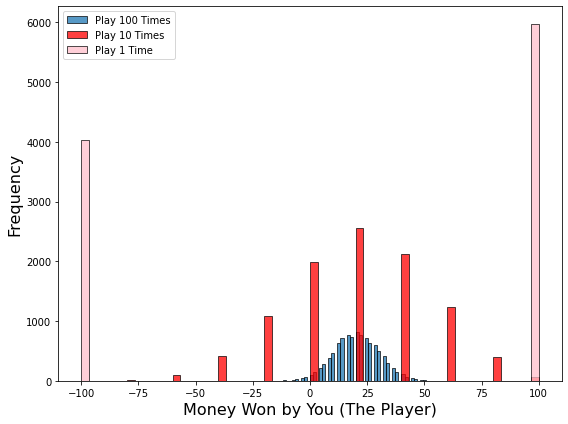

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Game 1
simulations = 10000  # number of Monte Carlo Simulations
games = 100          # number of times the game is played
threshold = 40       # threshold where if greater than or equal to you win
bet = 1              # dollar bet for the game

# outer loop is Monte Carlo sims and inner loop is games played
sim_results_1 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)  # get a random number to see who wins
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_1.append(sum(result))          # sim_results_1 stores results for Game 1
print('Game 1 Mean: ', round(np.mean(sim_results_1), 2))
print('Game 1 Prob Positive: ', round(sum([1 for i in sim_results_1 if i>0])/simulations, 2))
print('\n')
    
# Game 2 (structure of code is same as above)
simulations = 10000
games = 10
threshold = 40
bet = 10

sim_results_2 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_2.append(sum(result))
print('Game 2 Mean: ', round(np.mean(sim_results_2), 2))
print('Game 2 Prob Positive: ', round(sum([1 for i in sim_results_2 if i>0])/simulations, 2))
print('\n')
    
# Game 3 (structure of code is same as above)
simulations = 10000
games = 1
threshold = 40
bet = 100

sim_results_3 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_3.append(sum(result))
print('Game 3 Mean: ', round(np.mean(sim_results_3), 2))
print('Game 3 Prob Positive: ', round(sum([1 for i in sim_results_3 if i>0])/simulations, 2))


# Histogram that shows the distribution of the Monte Carlo Results for 2 spending levels
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(sim_results_1, kde=False, bins=60, label='Play 100 Times')
sns.histplot(sim_results_2, kde=False, bins=60, label='Play 10 Times', color='red')
sns.histplot(sim_results_3, kde=False, bins=60, label='Play 1 Time', color='pink')

ax.set_xlabel('Money Won by You (The Player)', fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
plt.legend()
plt.tight_layout()

plt.show()

# One-dimensional random walk

Randomly walk forward or backward along the $x$ axis, and calculate the average distance from the origin as a function of the number of steps walked

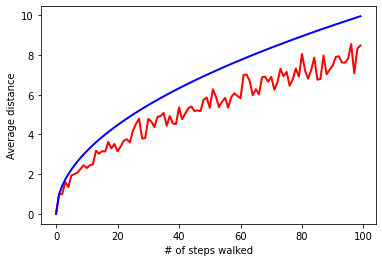

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# random walk along the x axis
def random_step(prev_x):
  dx = random.choice([1, -1])
  x = prev_x + dx
  return x

number_of_walks = 100
number_of_experiments = 200

# use two arrays to store number of walks and distance from the origin
index_array = []
distance_array = []

# now we fix the number of walks, but will do it many times to get the average distance
for iwalk in range(number_of_walks):
  
  # for a given number of walks we have, do experiments many times to get the average number
  distance_sum = 0.
  for iexp in range(number_of_experiments):
    # now do the actual walk for a given experiment
    x = 0  # set the initial position at the origin
    for i in range(iwalk):
      x = random_step(x)
    distance = np.abs(x)  # distance from the origin for one experiment
    distance_sum += distance
  average_distance = distance_sum / number_of_experiments

  index_array.append(iwalk)
  distance_array.append(average_distance)

# mathematically we expect that after N steps, it will be roughly sqrt(N) steps away from the origin
xpoints = np.arange(0, number_of_walks, 1)
ypoints = np.sqrt(xpoints)

plt.figure()
plt.plot(index_array, distance_array, 'r-', linewidth=2.0)
plt.plot(xpoints, ypoints, 'b', linewidth=2.0)
plt.xlabel('# of steps walked')
plt.ylabel('Average distance')
plt.show()

# Two-dimensional random walk

In [ ]:
# two dimensional random walk, want to know if the person walks N steps, what is the probability for him to be 
# less or equal to 4 blocks away from his initial position and thus no need to take public transportation
import random
import matplotlib.pyplot as plt

def random_walk(n):
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
    return (x, y)

number_of_walks = 10000

for walk_length in range(1, 31):
    no_transport = 0 # number of walks 4 or fewer blocks from home
    for i in range(number_of_walks):
        (x, y) = random_walk(walk_length)
        distance = abs(x) + abs(y)
        
        if distance <= 4:
            no_transport += 1

        no_transport_percentage = float(no_transport) / number_of_walks
    print("Walk size=", walk_length, " /% of no transport = ", 100*no_transport_percentage)

Walk size= 1  /% of no transport =  100.0
Walk size= 2  /% of no transport =  100.0
Walk size= 3  /% of no transport =  100.0
Walk size= 4  /% of no transport =  100.0
Walk size= 5  /% of no transport =  87.51
Walk size= 6  /% of no transport =  93.69
Walk size= 7  /% of no transport =  76.51
Walk size= 8  /% of no transport =  86.65
Walk size= 9  /% of no transport =  66.8
Walk size= 10  /% of no transport =  79.46
Walk size= 11  /% of no transport =  59.47
Walk size= 12  /% of no transport =  74.13
Walk size= 13  /% of no transport =  54.09
Walk size= 14  /% of no transport =  66.9
Walk size= 15  /% of no transport =  48.870000000000005
Walk size= 16  /% of no transport =  62.28
Walk size= 17  /% of no transport =  44.97
Walk size= 18  /% of no transport =  57.92
Walk size= 19  /% of no transport =  40.5
Walk size= 20  /% of no transport =  55.54
Walk size= 21  /% of no transport =  36.9
Walk size= 22  /% of no transport =  51.5
Walk size= 23  /% of no transport =  36.51
Walk size= 2

# Diffusion random walk

*Random-walk model of the diffusion of the drop of dye in water in a 2D environment*

Start with 800 particles in a square grid centered at (100, 100)
at each step, the program picks each particle and moves it 
one interger step in the x and y directions


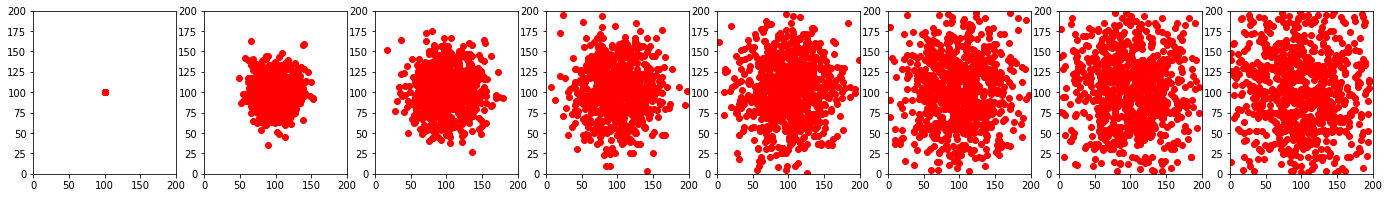

In [ ]:
import sys
import matplotlib.pyplot as plt
from random import randint 
import numpy as np

fig = plt.figure(1)
fig.set_figheight(3)
fig.set_figwidth(24)

atoms = np.ones([800, 2])*100

N = 4000   # steps
num_plots = 8
iplot = 0

for i in range(N) :
    if(i%500 == 0):
      iplot += 1
      ax = fig.add_subplot(1, 8, iplot)
      line, = plt.plot(atoms[:, 0], atoms[:, 1], 'ro')
      line.set_xdata(atoms[ : , 0])
      line.set_ydata(atoms[ : , 1])
      plt.xlim(0, 200)
      plt.ylim(0, 200)
      plt.draw()

    for j in range(800):   # number of atoms to simulate
        # Move each atom in the x and/ or y direction .
        atoms[j, 0] += randint(-1,1)
        atoms[j, 1] += randint(-1,1)

        # check boundary conditions
        x, y = (atoms[j, 0], atoms[j, 1])
        if x == 200:
            atoms[j, 0] = 198
        elif x == 0:
            atoms[j, 0] = 2
        if y == 200:
            atoms[j, 1] = 198
        elif y == 0 :
            atoms[j, 1] = 2

# Laws of large numbers

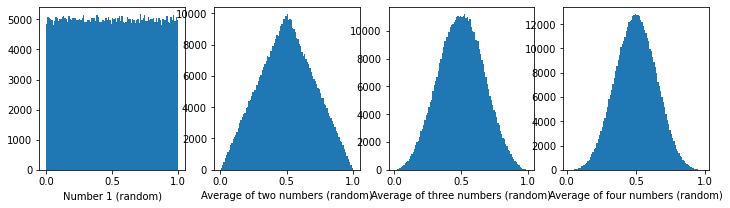

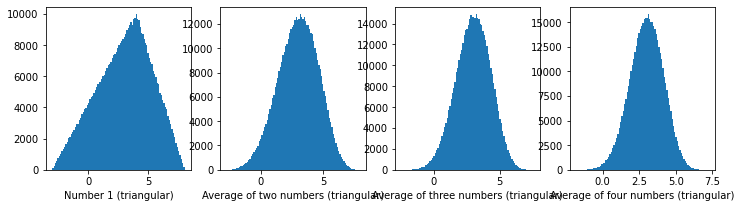

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=500000

array1 = np.random.random(N)
array2 = np.random.random(N)
array3 = np.random.random(N)
array4 = np.random.random(N)

array1_triangular = np.random.triangular(-3., 4., 8., N)
array2_triangular = np.random.triangular(-3., 4., 8., N)
array3_triangular = np.random.triangular(-3., 4., 8., N)
array4_triangular = np.random.triangular(-3., 4., 8., N)

average2 = (array1+array2)/2
average3 = (array1+array2+array3)/3
average4 = (array1+array2+array3+array4)/4
average2_triangular = (array1_triangular+array2_triangular)/2
average3_triangular = (array1_triangular+array2_triangular+array3_triangular)/3
average4_triangular = (array1_triangular+array2_triangular+array3_triangular+array4_triangular)/4

plt.figure(1, figsize=(12, 3))
plt.subplot(141)
plt.hist(array1, bins=100)
plt.xlabel("Number 1 (random)")
plt.subplot(142)
plt.hist(average2, bins=100)
plt.xlabel("Average of two numbers (random)")
plt.subplot(143)
plt.hist(average3, bins=100)
plt.xlabel("Average of three numbers (random)")
plt.subplot(144)
plt.hist(average4, bins=100)
plt.xlabel("Average of four numbers (random)")

plt.figure(2, figsize=(12, 3))
plt.subplot(141)
plt.hist(array1_triangular, bins=100)
plt.xlabel("Number 1 (triangular)")
plt.subplot(142)
plt.hist(average2_triangular, bins=100)
plt.xlabel("Average of two numbers (triangular)")
plt.subplot(143)
plt.hist(average3_triangular, bins=100)
plt.xlabel("Average of three numbers (triangular)")
plt.subplot(144)
plt.hist(average4_triangular, bins=100)
plt.xlabel("Average of four numbers (triangular)")
plt.show()

# Sudoku

In [ ]:
from random import sample

# pattern for a baseline valid solution
# Everything else is just randomization of that baseline solution by shuffling 
# rows, columns and numbers. 

base  = 3
side  = base*base

# create a base pattern for a given row and column 
def pattern(r, c): 
    return (base*(r%base)+r//base+c)%side

# randomize rows, columns and numbers (of valid base pattern) using the sample function in random()
def shuffle(s): 
    return sample(s, len(s)) 

rBase = range(base)  # rBase will go from 0 to 2 for 3x3
rows  = [ g*base + r for g in shuffle(rBase) for r in shuffle(rBase) ] 
cols  = [ g*base + c for g in shuffle(rBase) for c in shuffle(rBase) ]
nums  = shuffle(range(1, base*base+1))

# produce board using randomized baseline pattern
board = [ [nums[pattern(r, c)] for c in cols] for r in rows ]
for line in board: 
    print(line)
print("\n")

#
# now randomly remove some numbers
#
squares = side*side
# only keep about 1/4 of numbers in each row and column
empties = squares * 3//4  
for p in sample(range(squares), empties):
    board[p//side][p%side] = 0

numSize = len(str(side))
for line in board: 
    print("["+"  ".join(f"{n or '.':{numSize}}" for n in line)+"]")
print("\n")

#
# create a board and make it look nicer
#
def expandLine(line):
    return line[0]+line[5:9].join([line[1:5]*(base-1)]*base)+line[9:13]

line0  = expandLine("╔═══╤═══╦═══╗")
line1  = expandLine("║ . │ . ║ . ║")
line2  = expandLine("╟───┼───╫───╢")
line3  = expandLine("╠═══╪═══╬═══╣")
line4  = expandLine("╚═══╧═══╩═══╝")

symbol = " 1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
nums   = [ [""]+[symbol[n] for n in row] for row in board ]
print(line0)
for r in range(1,side+1):
    print( "".join(n+s for n,s in zip(nums[r-1],line1.split("."))) )
    print([line2,line3,line4][(r%side==0)+(r%base==0)])

[4, 9, 5, 7, 3, 6, 8, 2, 1]
[7, 3, 6, 8, 1, 2, 4, 5, 9]
[8, 1, 2, 4, 9, 5, 7, 6, 3]
[2, 4, 9, 5, 7, 3, 6, 1, 8]
[5, 7, 3, 6, 8, 1, 2, 9, 4]
[6, 8, 1, 2, 4, 9, 5, 3, 7]
[9, 5, 7, 3, 6, 8, 1, 4, 2]
[3, 6, 8, 1, 2, 4, 9, 7, 5]
[1, 2, 4, 9, 5, 7, 3, 8, 6]


[.  .  .  7  .  .  8  .  .]
[.  .  .  .  .  .  .  .  .]
[.  1  .  .  .  .  7  .  .]
[.  .  9  .  7  .  .  1  8]
[5  .  3  .  .  .  .  .  .]
[.  .  .  .  4  .  5  .  .]
[9  .  .  .  .  .  .  .  .]
[3  .  .  .  .  .  9  7  .]
[.  .  4  .  .  7  3  8  6]


╔═══╤═══╤═══╦═══╤═══╤═══╦═══╤═══╤═══╗
║   │   │   ║ 7 │   │   ║ 8 │   │   ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║   │   │   ║   │   │   ║   │   │   ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║   │ 1 │   ║   │   │   ║ 7 │   │   ║
╠═══╪═══╪═══╬═══╪═══╪═══╬═══╪═══╪═══╣
║   │   │ 9 ║   │ 7 │   ║   │ 1 │ 8 ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║ 5 │   │ 3 ║   │   │   ║   │   │   ║
╟───┼───┼───╫───┼───┼───╫───┼───┼───╢
║   │   │   ║   │ 4 │   ║ 5 │   │   ║
╠═══╪═══╪═══╬═══╪═══╪═══╬═══╪═══╪═══

# Particle decay

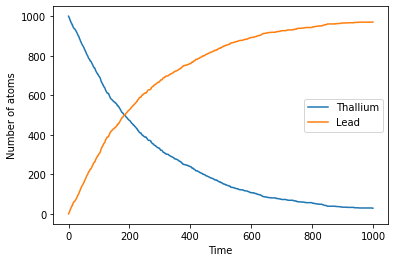

In [ ]:
from random import random
from numpy import arange
import matplotlib.pyplot as plt

'''
radiative decay of Tl^208 (thallium) --> Pb^208 (lead)
half-life of 3.053 minutes
'''
# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0, tmax, h)
Tlpoints = []
Pbpoints = []

# loop over each time point
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random() < p:   # p is the probability of decay in one step
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plt.plot(tpoints, Tlpoints, label="Thallium")
plt.plot(tpoints, Pbpoints, label="Lead")
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()